<a href="https://colab.research.google.com/github/rulocastellanos/practice_data_science_ml/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Based on** https://www.youtube.com/watch?v=EMoLTicNR6w


**Data** https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

**Objective:** The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it.

In [44]:
import pandas as pd

In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Clean_Dataset.csv')

In [ ]:
#How many categoies are in the relevant columns?
#In airline as we have more than 2 and not inmense like 100, it makes sensse to One hot encode
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [ ]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [ ]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [ ]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [ ]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [4]:
#It is more than 2
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
#Binary encode rather than one hot code
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [ ]:
df.duration.value_counts()

duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: count, Length: 476, dtype: int64

In [5]:
df.stops.value_counts()

,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
df.duration.min()

0.83

In [ ]:
df.duration.max()

49.83

In [ ]:
df.duration.mean()

12.221020812718846

In [ ]:
df.duration.median()

11.25

In [ ]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

**Preprocessing**

In [51]:
#Drop the features that are irrelevant

df = df.drop('Unnamed: 0', axis= 1)
df = df.drop('flight', axis= 1)

# Binary encoding
df['class'] = df['class'].apply(lambda x : 1 if x == 'Bussiness' else 0)

In [52]:
df.stops = pd.factorize(df.stops)[0]

**One hot encoding**

In [53]:
df = df.join(pd.get_dummies(df.airline, dtype= int, prefix = 'airline_')).drop('airline', axis = 1 )
df = df.join(pd.get_dummies(df.source_city, dtype= int, prefix = 'source_city_')).drop('source_city', axis = 1 )
df = df.join(pd.get_dummies(df.destination_city, dtype= int, prefix = 'dest_')).drop('destination_city', axis = 1 )
df = df.join(pd.get_dummies(df.arrival_time, dtype= int, prefix = 'arrival_')).drop('arrival_time', axis = 1 )
df = df.join(pd.get_dummies(df.departure_time, dtype= int, prefix = 'departure_')).drop('departure_time', axis = 1 )
df

,stops,class,duration,days_left,price,airline__AirAsia,airline__Air_India,airline__GO_FIRST,airline__Indigo,airline__SpiceJet,...,arrival__Evening,arrival__Late_Night,arrival__Morning,arrival__Night,departure__Afternoon,departure__Early_Morning,departure__Evening,departure__Late_Night,departure__Morning,departure__Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,0,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,0,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,0,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,0,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


**Train Random Forest Regression**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [54]:
X, y = df.drop('price', axis = 1 ), df.price

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
#n_jobs parameter controls the number of parallel jobs or processes to run for the computation

reg = RandomForestRegressor()

reg.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
reg.score(X_test, y_test)

-0.3297824166024521

In [38]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
df

,stops,class,duration,days_left,price,airline__AirAsia,airline__Air_India,airline__GO_FIRST,airline__Indigo,airline__SpiceJet,...,arrival__Evening,arrival__Late_Night,arrival__Morning,arrival__Night,departure__Afternoon,departure__Early_Morning,departure__Evening,departure__Late_Night,departure__Morning,departure__Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,0,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,0,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,0,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,0,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [58]:
y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: -0.3297824166024521
MAE: 18985.333540359832
MSE: 685049714.6452038
RMSE: 26173.454388849856


Text(0.5, 1.0, 'Predicted vs Real')

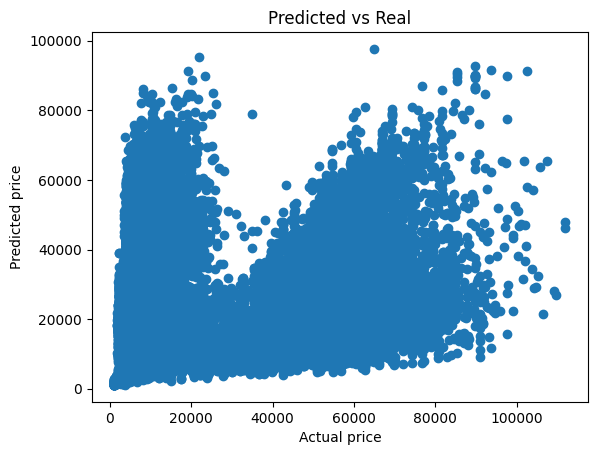

In [59]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Real')